In [61]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Librerias

In [1]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import Levenshtein as lev
import pandas as pd
import seaborn as sns
#sns.set_style("darkgrid")
import seaborn as sb
import matplotlib.pyplot as plot
from google.colab import drive
from matplotlib import pyplot as plt

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Ejemplos de uso

In [3]:
Str1 = "Apple Inc."
Str2 = "apple Inc"
Distance = lev.distance(Str1.lower(),Str2.lower()),
print(Distance)
Ratio = lev.ratio(Str1.lower(),Str2.lower())
print(Ratio)

(1,)
0.9473684210526316


In [4]:
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
print(Ratio)

95


Subcadenas

In [5]:
Str1 = "Los Angeles Lakers"
Str2 = "Lakers"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
print(Ratio)
print(Partial_Ratio)

50
100


In [6]:
Str1 = "united states v. nixon"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)

59
74
100


In [7]:
Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower()) # metodo ratio: da el porcentaje 
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower()) # metodo partial_ratio: toma la cadena mas corta y la compara con las subcadenas de la otra cadena que tienen la misma longitud
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2) # metodo token sort_ratio: similar al anterior pero sim importar el orden y hay tokenizacion
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2) # similar al anterior pero elimina los tokens comunes o que se repiten, es utili cuando las cadenas difiren mucho en longitud
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)

57
77
58
95


https://strikingloo.github.io/fuzzywuzzy-python-string-distance#:~:text=Using%20FuzzyWuzzy%20in%20Python&text=It%20can%20be%20shown%20that,then%20add%20the%20remaining%20ones.

https://towardsdatascience.com/fuzzy-string-matching-in-python-68f240d910fe

https://towardsdatascience.com/string-matching-with-fuzzywuzzy-e982c61f8a84

https://medium.com/analytics-vidhya/fuzzy-matching-in-python-2def168dee4a

https://maxbachmann.github.io/Levenshtein/levenshtein.html

# Importamos Videos

In [59]:
# ======================== OJO Modificar para cada serie ========================

pathVD='/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/SEARCHES/YoutubeResults/Series/\
Dignity/Similaridad/LematizadoDignityCompletos.csv'

# ======================== OJO Modificar para cada serie ========================

dfVD= pd.read_csv(pathVD)
dfVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   idVideo                                      310 non-null    object 
 1   TituloVideo                                  310 non-null    object 
 2   TituloVideoModificado                        310 non-null    object 
 3   emojisTituloVideo                            310 non-null    object 
 4   URLsTituloVideo                              310 non-null    object 
 5   hashtagsTituloVideo                          310 non-null    object 
 6   MencionesTituloVideo                         310 non-null    object 
 7   DescripcionVideo                             308 non-null    object 
 8   DescripcionVideoModificado                   308 non-null    object 
 9   emojisDescripcionVideo                       310 non-null    object 
 10  UR

# Similaridad Levenshtein

In [60]:
def similaridadLeve(T,C):
  T=list(T)
  C=list(C)
  similaridad=[]
  for i in range(len(T)):
    similaridad.append(fuzz.token_set_ratio(T[i],C[i]))
  return similaridad

In [61]:
z=similaridadLeve(dfVD['TotalTextoVideoModificadoLematizadoProfundo'],dfVD['ConsultaVideoModificadoLematizadoProfundo'])
len(z)

310

In [62]:
SC=pd.Series(z, name='Levenshtein')
SC

0       74
1      100
2       89
3       89
4      100
      ... 
305     61
306     76
307     61
308     76
309     61
Name: Levenshtein, Length: 310, dtype: int64

In [63]:
Videospuntaje=pd.concat([dfVD,SC],axis=1)
Videospuntaje

,idVideo,TituloVideo,TituloVideoModificado,emojisTituloVideo,URLsTituloVideo,hashtagsTituloVideo,MencionesTituloVideo,DescripcionVideo,DescripcionVideoModificado,emojisDescripcionVideo,...,PaisVideo,SolicitudVideo,TituloEtiquetasVideo,TotalTextoVideoModificado,Cos(BolsaPalabras),Cos(TF_IDF),Cos(Ngrams),ConsultaVideoModificadoLematizadoProfundo,TotalTextoVideoModificadoLematizadoProfundo,Levenshtein
0,SPqQWyflb_E,TOP 10 Mejores SERIES en AMAZON PRIME VIDEO,top mejores series amazon prime video,[],[],[],[],Te presento Las 10 MEJORES SERIES EN AMAZON PR...,presento mejores series amazon prime video par...,"[('👍', 3), ('😍', 2), ('❤', 2), ('😜', 1), ('😉',...",...,CL,1,top mejores series amazon prime video mejores ...,top mejores series amazon prime video presento...,0.501066,0.173660,0.434813,serie dignidad amazon prime video trailer,top mejor serie amazon prime video presentar m...,74
1,cYwqJ0AouSU,Dignidad - Tráiler oficial | Amazon Prime Video,dignidad trailer oficial amazon prime video,[],[],[],[],"Acerca de la serie Chile, 1997. El abogado Le...",acerca serie chile abogado leo ramirez recluta...,[],...,CL,1,dignidad trailer oficial amazon prime video pr...,dignidad trailer oficial amazon prime video ac...,0.684319,0.421197,0.493215,serie dignidad amazon prime video trailer,dignidad trailer oficial amazon prime video ac...,100
2,NKpiPAX3iEg,Dignidad - Serie chilena Amazon Prime Video,dignidad serie chilena amazon prime video,[],[],[],[],"Ambientada en el sur de Chile, la serie cuenta...",ambientada sur chile serie cuenta historia mis...,[],...,CL,1,dignidad serie chilena amazon prime video,dignidad serie chilena amazon prime video ambi...,0.476290,0.331997,0.271363,serie dignidad amazon prime video trailer,dignidad serie chileno amazon prime video ambi...,89
3,K0N0U0gIaFk,Dignidad - Cosas que no sabías sobre Dignidad ...,dignidad cosas sabias dignidad amazon prime video,[],[],[],[],"Acerca de la serie Chile, 1997. El abogado L...",acerca serie chile abogado leo ramirez recluta...,[],...,CL,1,dignidad cosas sabias dignidad amazon prime vi...,dignidad cosas sabias dignidad amazon prime vi...,0.638889,0.377643,0.491901,serie dignidad amazon prime video trailer,dignidad cosa sabias dignidad amazon prime vid...,89
4,BwNgtZIZWT4,Dignidad - Serie - Tráiler ESPAÑOL,dignidad serie trailer espanol,[],[],[],[],Dignidad - Serie - Tráiler ESPAÑOL Amazon Pri...,dignidad serie trailer espanol amazon prime vi...,[],...,CL,1,dignidad serie trailer espanol dignidad coloni...,dignidad serie trailer espanol dignidad serie ...,0.601722,0.584885,0.335760,serie dignidad amazon prime video trailer,dignidad serie trailer espanol dignidad serie ...,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Z6T1fVX3MHM,Adèle intenta delatar a Amaia | El Internado: ...,adele intenta delatar amaia internado cumbres ...,[],[],[],[],Para acabar con el terrible castigo al que est...,acabar terrible castigo siendo sometida clase ...,[],...,DE,7,adele intenta delatar amaia internado cumbres ...,adele intenta delatar amaia internado cumbres ...,0.282466,0.069103,0.223734,serie dignidad prime video mejor escena,adele intentar delatar amaia internado cumbres...,61
306,CNKgsl7Iwfc,Paz visita a Eric en la enfermería de El Inter...,paz visita eric enfermeria internado internado...,[],[],[],[],"Tras el misterioso incidente que sufre Eric, e...",tras misterioso incidente sufre eric casi salt...,[],...,DE,7,paz visita eric enfermeria internado internado...,paz visita eric enfermeria internado internado...,0.278064,0.065796,0.223861,serie dignidad prime video mejor escena,paz visita eric enfermeria internado internado...,76
307,0tHZzYsaAeU,"Los alumnos de El Internado juegan a ""Yo Nunca...",alumnos internado juegan nunca internado cumbr...,[],[],[],[],Lo que empieza como un inocente juego de fiest...,empieza inocente juego fiesta rapidamente deve...,[],...,DE,7,alumnos internado juegan nunca internado cumbr...,alumnos internado juegan

# Ordenamos datos

In [64]:
Videospuntaje.sort_values(by=['Levenshtein','ComentariosVideo'], inplace=True, ascending=False)
Videospuntaje

,idVideo,TituloVideo,TituloVideoModificado,emojisTituloVideo,URLsTituloVideo,hashtagsTituloVideo,MencionesTituloVideo,DescripcionVideo,DescripcionVideoModificado,emojisDescripcionVideo,...,PaisVideo,SolicitudVideo,TituloEtiquetasVideo,TotalTextoVideoModificado,Cos(BolsaPalabras),Cos(TF_IDF),Cos(Ngrams),ConsultaVideoModificadoLematizadoProfundo,TotalTextoVideoModificadoLematizadoProfundo,Levenshtein
1,cYwqJ0AouSU,Dignidad - Tráiler oficial | Amazon Prime Video,dignidad trailer oficial amazon prime video,[],[],[],[],"Acerca de la serie Chile, 1997. El abogado Le...",acerca serie chile abogado leo ramirez recluta...,[],...,CL,1,dignidad trailer oficial amazon prime video pr...,dignidad trailer oficial amazon prime video ac...,0.684319,0.421197,0.493215,serie dignidad amazon prime video trailer,dignidad trailer oficial amazon prime video ac...,100
16,i_6E10appCA,👉🏻 Conoce la Historia de PAUL SCHÄFER 🤬 - 🏞️ D...,conoce historia paul schafer dignidad estreno ...,"[('⚠', 2), ('👉', 1), ('🤬', 1), ('🏞', 1), ('🗻',...",[],[],[],DIGNIDAD está ambientada en el sur de Chile y ...,dignidad ambientada sur chile cuenta historia ...,"[('👇', 12), ('👉', 7), ('📺', 2), ('📸', 2), ('📲'...",...,CL,1,conoce historia paul schafer dignidad estreno ...,conoce historia paul schafer dignidad estreno ...,0.728780,0.485896,0.480292,serie dignidad amazon prime,conocer historia paul schafer dignidad estreno...,100
17,O7B5ybluRIE,"Dignidad, la serie de Amazon con un actor para...",dignidad serie amazon actor paraguayo,[],[],[],[],“Dignidad” es una serie de Amazon Prime en la ...,dignidad serie amazon prime actua marcel rodri...,[],...,CL,1,dignidad serie amazon actor paraguayo abc tv c...,dignidad serie amazon actor paraguayo dignidad...,0.553912,0.347170,0.278639,serie dignidad amazon prime,dignidad serie amazon actor paraguayo dignidad...,100
4,BwNgtZIZWT4,Dignidad - Serie - Tráiler ESPAÑOL,dignidad serie trailer espanol,[],[],[],[],Dignidad - Serie - Tráiler ESPAÑOL Amazon Pri...,dignidad serie trailer espanol amazon prime vi...,[],...,CL,1,dignidad serie trailer espanol dignidad coloni...,dignidad serie trailer espanol dignidad serie ...,0.601722,0.584885,0.335760,serie dignidad amazon prime video trailer,dignidad serie trailer espanol dignidad serie ...,100
5,icmkH5XYrDE,DIGNIDAD (2020) Tráiler HD [ESPAÑOL LATINO] Am...,dignidad trailer hd espanol latino amazon prim...,[],[],[],[],#FanaticMovies SUSCRÍBETE ES GRATIS 😀👍🔔 / SUBS...,fanatic movies suscribete gratis subscribe fre...,"[('😀', 2), ('👍', 2), ('🔔', 2), ('👉', 1), ('👈',...",...,CL,1,dignidad trailer hd espanol latino amazon prim...,dignidad trailer hd espanol latino amazon prim...,0.552771,0.417618,0.344083,serie dignidad amazon prime video trailer,dignidad trailer hd espanol latino amazon prim...,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,ZlW0z9oZBlI,The Umbrella Academy Temporada 2 Tráiler o...,umbrella academy temporada trailer oficial net...,[],[],[],[],The Umbrella Academy Temporada 2 Tráiler o...,umbrella academy temporada trailer oficial net...,[],...,CL,2,umbrella academy temporada trailer oficial net...,umbrella academy temporada trailer oficial net...,0.166667,0.051607,0.067344,serie dignidad trailer amazon prime video,umbrella academy temporada trailer oficial net...,46
91,AtCSOVfmJmo,On My Block Temporada 3 Tráiler oficial Ne...,block temporada trailer oficial netflix,[],[],[],[],Nuevo año. Nueva misión. Mismo barrio. La temp...,nuevo ano nueva mision mismo barrio temporada ...,[],...,CL,2,block temporada trailer oficial netflix,block temporada trailer oficial netflix nuevo ...,0.087039,0.023017,0.037424,serie dignidad trailer amazon prime video,block temporada trailer oficial netflix nuevo ...,43
98,cEyp7NUGlfw,DARK Temporada 2 Avance El viaje del héroe...,dark temporada avance viaje heroe netflix,[],[],[],[],os habitantes de Winden están atrapados en un ...,habitantes winden estan atrapados juego destin...,[],...,CL,2,dark temporada avan

# Graficos

In [65]:
serie='Dignity'
tv='Dignity'
# colores -> #9932CC(EPM), #008B8B(Dignity), #8B0000(Los 80), #FF7F50(Tres Caines), #6495ED(Narcos)

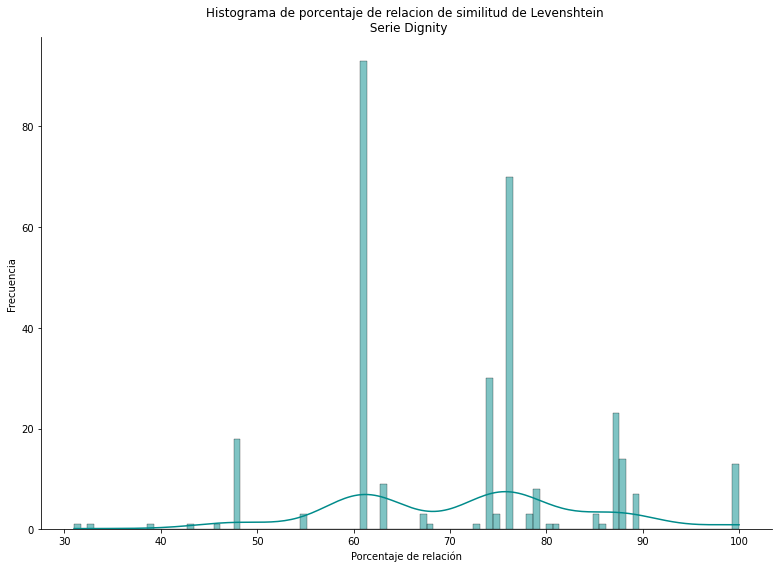

In [66]:
grafica1=sb.displot(Videospuntaje['Levenshtein'], bins=100, color='#008B8B', kde=True, ) #creamos el gráfico en Seaborn
plot.ylabel('Frecuencia')
plot.xlabel('Porcentaje de relación')
plot.title('Histograma de porcentaje de relacion de similitud de Levenshtein \n Serie {}'.format(tv))
plt.gcf().set_size_inches(12, 8)
plot.show()

In [67]:
grafica1.figure.savefig("/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/DOCUMENTS/YoutubeReport/Videos/HistogramaLevenshtein/HistogramaLevenshtein"+serie+".png",bbox_inches='tight')

# Exportando modelos de temas

In [57]:
ruta='/content/drive/MyDrive/AI-GUMELAB/CognASSISTANT-1/SEARCHES/YoutubeResults/Series/\
'+serie+'/Similaridad'

In [58]:
nombre='SimilaridadLevenshtein'
Videospuntaje.to_csv(ruta+'/'+nombre+'.csv', index=False)